<a href="https://colab.research.google.com/github/mileribeiro/runner-insights/blob/main/runner_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
# Ensures inline plotting for Jupyter Notebooks
%matplotlib inline

# Fetching the URL
url = "http://www.hubertiming.com/results/2017GPTR10K"
response = requests.get(url)  # Sends an HTTP request to the URL
html = response.content  # Stores the response content (HTML)

# Creating a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(html, "lxml")

# Extracting all table rows ('tr') from the parsed HTML
rows = soup.find_all("tr")

# Initializing an empty list to store the row data
list_row = []
for row in rows:
    row_td = row.find_all('td')  # Finds all table data ('td') in each row
    cells_str = str(row_td)  # Converts the 'td' data to a string
    clean_text = BeautifulSoup(cells_str, "lxml").get_text()  # Cleans the HTML tags, extracting only the text
    list_row.append(clean_text)  # Appends the cleaned text to the list

# Extracting column labels (headers) from the HTML
col_labels = soup.find_all("th")
all_header = []
col_str = str(col_labels)  # Converts headers to string
clean_col = BeautifulSoup(col_str, "lxml").get_text()  # Cleans the HTML tags from the headers
all_header.append(clean_col)  # Appends the cleaned headers to the list

# Creating a DataFrame with the row data
df = pd.DataFrame(list_row)
df1 = df[0].str.split(',', expand=True)  # Splits the data by comma and expands it into columns

# Creating a DataFrame for the headers
df2 = pd.DataFrame(all_header)
df3 = df2[0].str.split(",", expand=True)  # Splits the header string by comma
df3[0] = df3[0].str.strip('[')  # Removes '[' from the first header
df3[8] = df3[8].str.strip(']')  # Removes ']' from the last header

# Concatenating the header DataFrame (df3) with the row DataFrame (df1)
frames = [df3, df1]
df4 = pd.concat(frames)

# Renaming the columns with the first row (header row)
df5 = df4.rename(columns=df4.iloc[0])

# Dropping rows with missing values and removing the header row from the DataFrame
df6 = df5.dropna(axis=0, how="any")
df7 = df6.drop(df6.index[0])

# Function to standardize time in hh:mm:ss format, adding '00:' for rows that only have mm:ss
def standard_time(t):
    if len(t.split(':')) == 2:  # If the time format is mm:ss
        return '00:' + t  # Add '00:' to make it hh:mm:ss
    return t  # Return the time if already in hh:mm:ss format

# Applying the time standardization to the 'Time' column
df7[' Time'] = df7[' Time'].apply(standard_time)

# Cleaning and stripping unwanted characters from specific columns
df7["Place"] = df7["Place"].str.strip('[')  # Removes '[' from 'Place' column
df7[' Name'] = df7[' Name'].str.strip('\r\n\r\n ')  # Cleans extra spaces and newlines from 'Name'
df7[' Team'] = df7[' Team'].str.strip('\n\r\n ' and '\r\n ]')  # Cleans 'Team' field

# Creating a list of time values
time_list = df7[' Time'].tolist()

# Initializing lists to store hours, minutes, and seconds separately
hour = []
min = []
second = []

# Splitting the time into hours, minutes, and seconds
for time in time_list:
    time_split = time.split(':')  # Splits time by ':'
    hour.append(time_split[0])  # Appends hours
    min.append(time_split[1])  # Appends minutes
    second.append(time_split[2])  # Appends seconds

# Converting hours into minutes (1 hour = 60 minutes)
hour_min = []
for time in hour:
  hour_int = int(time)  # Converts hour string to integer
  hour_min_int = hour_int * 60  # Multiplies hour by 60 to convert to minutes
  hour_min.append(hour_min_int)  # Appends the result to the list

# Converting minutes to integers and appending to the list
min_min = []
for time in min:
  min_int = int(time)
  min_min.append(min_int)

# Converting seconds to fractional minutes and appending to the list
second_min = []
for elements in second:
  second_int = int(elements)  # Converts seconds to integers
  second_min_int = second_int / 60  # Converts seconds to fractional minutes
  second_min.append(second_min_int)

# Summing the converted hours, minutes, and seconds into total time in minutes
sum_list = [x + y + z for x, y, z in zip(hour_min, min_min, second_min)]

# Adding the total time in minutes as a new column to the DataFrame
df7["Runner_min"] = sum_list

df7.head(577)

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Runner_min
5,1,814,JARED WILSON,M,TIGARD,OR,00: 36:21,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00: 36:42,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00: 37:44,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,00: 38:34,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00: 39:21,39:24,INTEL TEAM F,39.350000
...,...,...,...,...,...,...,...,...,...,...
577,573,273,RACHEL L VANEY,F,OTHER,OR,1:38:17,1:38:34,,98.283333
578,574,467,ROHIT B DSOUZA,M,PORTLAND,OR,1:38:31,1:40:32,INTEL TEAM I,98.516667
579,575,471,CENITA D'SOUZA,F,PORTLAND,OR,1:38:32,1:40:34,,98.533333
580,576,338,PRANAVI APPANA,F,HILLSBORO,OR,1:40:47,1:42:01,,100.783333


In [ ]:
# Displaying the descriptive statistics of the DataFrame
df7.describe()

,Runner_min
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


> Curiosamente, o tempo médio de chip para todos os corredores foi de ~60 minutos.

> O corredor de 10 km mais rápido terminou em 36,35 minutos, e o corredor mais lento terminou em 101,30 minutos.

# Os tempos de chegada dos corredores seguiram uma distribuição normal?

> A distribuição parece quase normal.

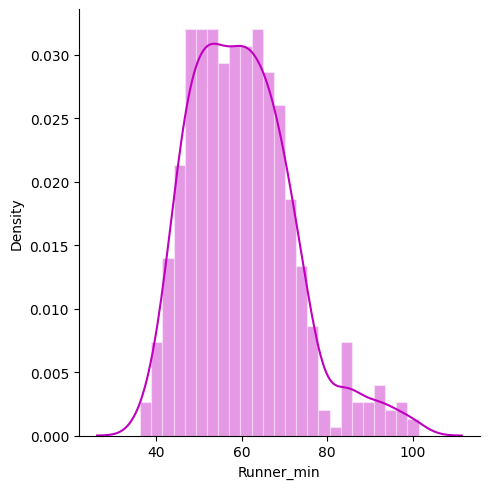

In [ ]:
ax = sns.displot(df7['Runner_min'], kde=True, color='m', bins=25, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

# Houve diferença de desempenho entre homens e mulheres?

> A distribuição indica que as mulheres foram mais lentas que os homens em média

        Runner_min                                                         \
             count       mean        std        min        25%        50%   
 Gender                                                                     
 F           163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M           414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


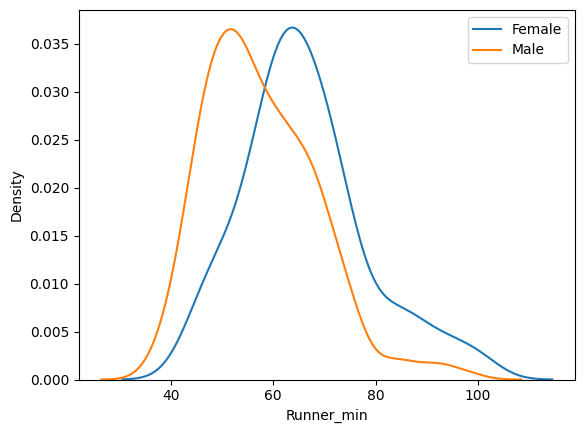

In [ ]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_min']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_min']
sns.kdeplot(f_fuko, label='Female')
sns.kdeplot(m_fuko, label='Male')
plt.legend()

g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)